In [1]:
!ls /kaggle/input/sistema-de-informaes-hospitalares-sus

RD202401.csv  RD202404.csv  RD202407.csv  RD202410.csv
RD202402.csv  RD202405.csv  RD202408.csv  RD202411.csv
RD202403.csv  RD202406.csv  RD202409.csv  RD202412.csv


# Etapa 1: Coleta de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configura a biblioteca pandas para exibir todos os itens da sequência do base de dados
pd.options.display.max_seq_items = 113

# Carrega a base de dados
df = pd.read_csv('/kaggle/input/sistema-de-informaes-hospitalares-sus/RD202401.csv', sep=';', low_memory=False)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,120000,2024,1,3,4.034526e+12,1224100031374,1,69911814,120040,19560415,...,NaN,0,0,0,0,0,0,0,0,0
1,120000,2024,1,3,4.034526e+12,1224100031539,1,69900970,120040,19520515,...,NaN,0,0,0,0,0,0,0,0,0
2,120000,2024,1,3,4.034526e+12,1224100031550,1,69934000,120025,19980315,...,NaN,0,0,0,0,0,0,0,0,0
3,120000,2024,1,3,4.034526e+12,1224100031650,1,69900100,120040,19460726,...,NaN,0,0,0,0,0,0,0,0,0
4,120000,2024,1,3,4.034526e+12,1224100031814,1,69900970,120040,20200313,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107872,172120,2024,1,2,NaN,1724100104430,1,77900000,172120,20011130,...,NaN,0,0,0,0,0,0,0,0,0
1107873,172120,2024,1,2,NaN,1724100104441,1,77900000,172120,19950319,...,NaN,0,0,0,0,0,0,0,0,0
1107874,172120,2024,1,2,NaN,1724100104452,1,77958000,172010,20010904,...,NaN,0,0,0,0,0,0,0,0,0
1107875,172120,2024,1,2,NaN,1724100104463,1,77950000,170220,19930609,...,NaN,0,0,0,0,0,0,0,0,0


# Etapa 2: Limpeza dos dados

In [3]:
# Mostra as colunas em sequência da base de dados
df.columns

Index(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT',
       'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN',
       'UTI_MES_AL', 'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_IN', 'UTI_INT_AN',
       'UTI_INT_AL', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC',
       'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP',
       'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG',
       'VAL_PED1AC', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA',
       'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO',
       'RUBRICA', 'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM',
       'MORTE', 'NACIONAL', 'NUM_PROC', 'CAR_INT', 'TOT_PT_SP', 'CPF_AUT',
       'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1',
       'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER',
       'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'GESTOR_DT',
       'CNES', 'CNPJ_M

In [4]:
# Delimitar as colunas de interesse em recorte da base de dados
df = df[[
    'UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO',
    'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC',
    'PROC_REA', 'VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI', 'US_TOT', 'DT_INTER', 'DT_SAIDA',
    'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'NATUREZA', 'NAT_JUR', 'GESTAO',
    'IND_VDRL', 'MUNIC_MOV', 'COD_IDADE', 'IDADE', 'DIAS_PERM', 'MORTE', 'NACIONAL',
    'CAR_INT', 'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'CID_NOTIF', 'CONTRACEP1',
    'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER',
    'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_DT', 'CNES', 'INFEHOSP', 
    'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'FINANC', 'FAEC_TP', 'REGCT', 'RACA_COR', 'ETNIA',
    'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI', 'MARCA_UCI'
]].copy()

In [5]:
# Gera um resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107877 entries, 0 to 1107876
Data columns (total 69 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UF_ZI       1107877 non-null  int64  
 1   ANO_CMPT    1107877 non-null  int64  
 2   MES_CMPT    1107877 non-null  int64  
 3   ESPEC       1107877 non-null  int64  
 4   N_AIH       1107877 non-null  int64  
 5   IDENT       1107877 non-null  int64  
 6   CEP         1107877 non-null  int64  
 7   MUNIC_RES   1107877 non-null  int64  
 8   NASC        1107877 non-null  int64  
 9   SEXO        1107877 non-null  int64  
 10  UTI_MES_TO  1107877 non-null  int64  
 11  MARCA_UTI   1107877 non-null  int64  
 12  UTI_INT_TO  1107877 non-null  int64  
 13  DIAR_ACOM   1107877 non-null  int64  
 14  QT_DIARIAS  1107877 non-null  int64  
 15  PROC_SOLIC  1107877 non-null  int64  
 16  PROC_REA    1107877 non-null  int64  
 17  VAL_SH      1107877 non-null  float64
 18  VAL_SP      1107877 no

In [6]:
# Transformar variável categórica
df['DIAG_PRINC'] = df['DIAG_PRINC'].astype(str)
df['CID_NOTIF'] = df['CID_NOTIF'].astype(str)

In [7]:
df['UF_ZI'] = df['UF_ZI'].astype(str)

In [8]:
# Verifica se há variáveis com valores nulos
df.isnull().sum()

UF_ZI         0
ANO_CMPT      0
MES_CMPT      0
ESPEC         0
N_AIH         0
             ..
VAL_SP_FED    0
VAL_SH_GES    0
VAL_SP_GES    0
VAL_UCI       0
MARCA_UCI     0
Length: 69, dtype: int64

In [9]:
# Pré-processamento
# Filtrar para a Bahia (código 29)
df['UF_ZI'] = df['UF_ZI'].astype(str)
df_bahia = df[df['UF_ZI'].str.startswith('29')].copy()

In [10]:
# Converter data de internação para datetime (formato 'aaaammdd')
df_bahia['DT_INTER'] = pd.to_datetime(df_bahia['DT_INTER'], format='%Y%m%d', errors='coerce')
df_bahia['DT_SAIDA'] = pd.to_datetime(df_bahia['DT_SAIDA'], format='%Y%m%d', errors='coerce')
df_bahia = df_bahia.dropna(subset=['DT_INTER']) # Remover datas inválidas se houver
df_bahia = df_bahia.dropna(subset=['DT_SAIDA']) 

In [11]:
# Importando os dados de municípios
df_municipios = pd.read_csv('/kaggle/input/municipios/municipios.csv')
df_municipios

,Id,Codigo,Nome,Uf
0,1,1100015,Alta Floresta D'Oeste,RO
1,2,1100023,Ariquemes,RO
2,3,1100031,Cabixi,RO
3,4,1100049,Cacoal,RO
4,5,1100056,Cerejeiras,RO
...,...,...,...,...
5565,5566,5222005,Vianópolis,GO
5566,5567,5222054,Vicentinópolis,GO
5567,5568,5222203,Vila Boa,GO
5568,5569,5222302,Vila Propício,GO


In [12]:
# Convertendo o código do município para string e pegando apenas os 6 primeiros caracteres
# e filtrando para o estado da Bahia
df_municipios['Codigo'] = df_municipios['Codigo'].astype(str).str[:6]
df_municipios = df_municipios[df_municipios['Codigo'].str.startswith('29')]
df_municipios

,Id,Codigo,Nome,Uf
1827,1828,290010,Abaíra,BA
1828,1829,290020,Abaré,BA
1829,1830,290030,Acajutiba,BA
1830,1831,290035,Adustina,BA
1831,1832,290040,Água Fria,BA
...,...,...,...,...
2239,2240,293330,Vitória da Conquista,BA
2240,2241,293340,Wagner,BA
2241,2242,293345,Wanderley,BA
2242,2243,293350,Wenceslau Guimarães,BA


# Etapa 3: Interpretação e comunicação dos resultados
## Pergunta 1: Quais cidades tem o maior numero de internações?

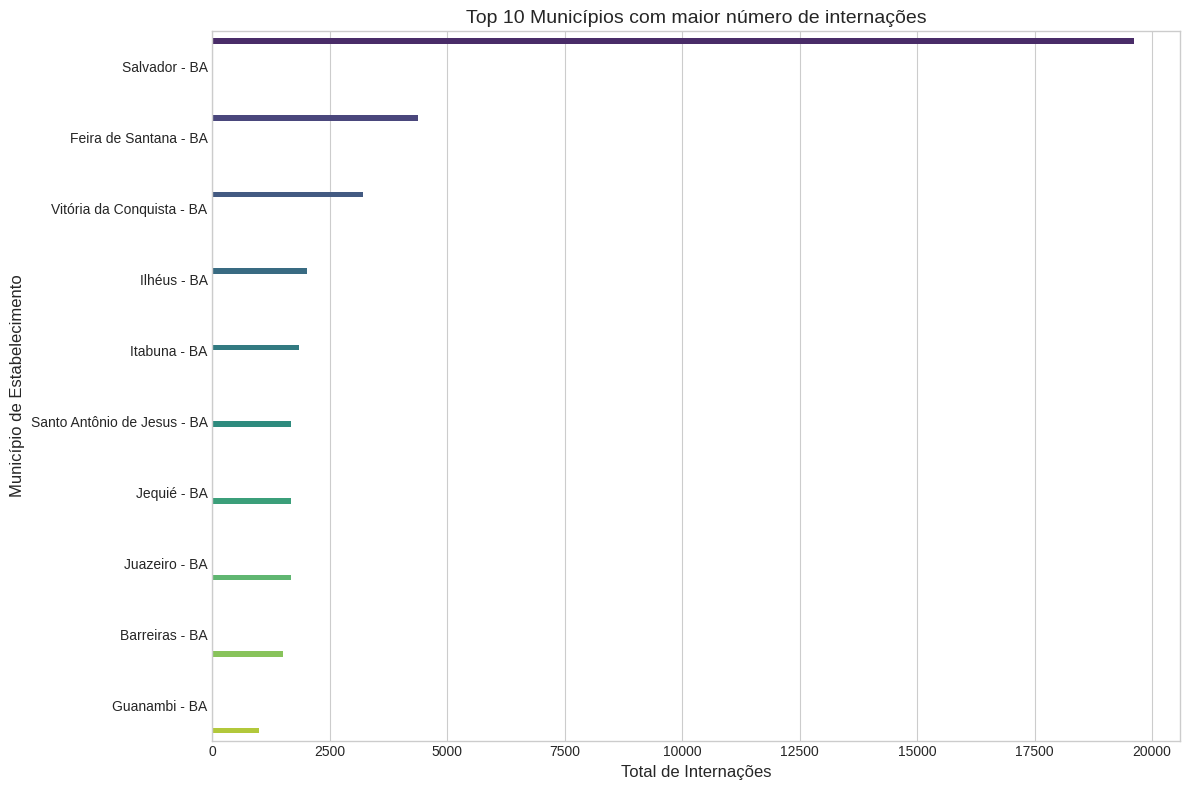

In [13]:
# Contagem das 10 cidades com mais internações
contagem_internacoes = df_bahia['MUNIC_MOV'].value_counts().nlargest(10).reset_index()
contagem_internacoes['MUNIC_MOV'] = contagem_internacoes['MUNIC_MOV'].astype(str)
contagem_internacoes.columns = ['MUNIC_MOV', 'INTER']

# Merge com o dataframe de municípios
top_municipios = pd.merge(
    contagem_internacoes,
    df_municipios,
    left_on='MUNIC_MOV',
    right_on='Codigo'
)

# Criando coluna com nome formatado
top_municipios['Municipios'] = top_municipios['Nome'] + ' - ' + top_municipios['Uf']

# Gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=top_municipios,
    x='INTER',
    y='Municipios',
    hue='Municipios',
    palette='viridis',
    ax=ax
)

ax.set_title('Top 10 Municípios com maior número de internações', fontsize=14)
ax.set_xlabel('Total de Internações', fontsize=12)
ax.set_ylabel('Município de Estabelecimento', fontsize=12)
ax.legend_.remove()
plt.tight_layout()
plt.show()


## Pergunta 2: Qual é a distribuição de internações por sexo dos pacientes na Bahia?

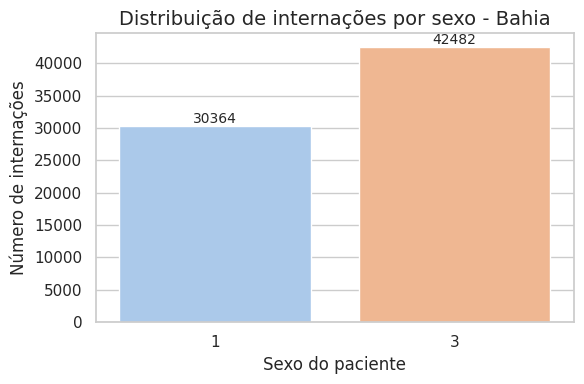

In [14]:
# Contar internações por sexo
sexo_counts = df_bahia['SEXO'].value_counts().reset_index()
sexo_counts.columns = ['SEXO', 'QTD_INTERNAÇÕES']

# Mapeamento e Limpeza: 1=Masc, 2=Fem.
df_bahia.loc[df_bahia['SEXO'] == 3, 'SEXO'] = 2

# Criar o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(data=sexo_counts, x='SEXO', y='QTD_INTERNAÇÕES', palette='pastel')

# Melhorar rótulos
plt.title('Distribuição de internações por sexo - Bahia', fontsize=14)
plt.xlabel('Sexo do paciente', fontsize=12)
plt.ylabel('Número de internações', fontsize=12)

# Adicionar rótulos nos valores
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

## Pergunta 3: Qual é a faixa etária mais frequente entre os pacientes internados em hospitais baianos?

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


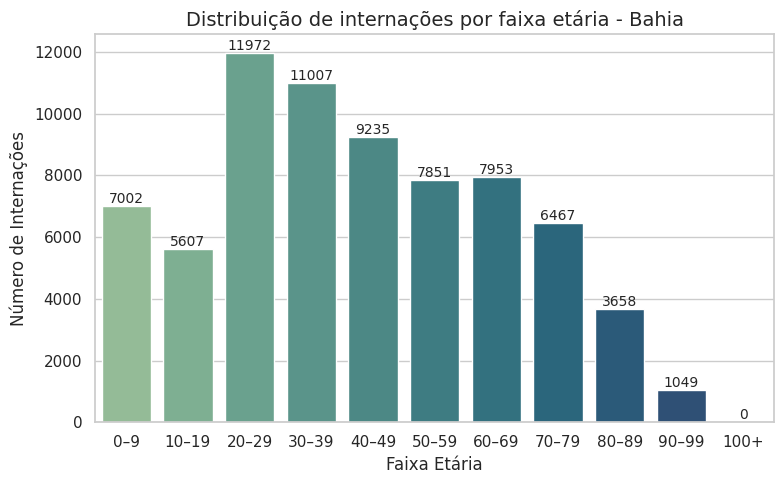

In [15]:
# Criar faixas etárias
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0–9', '10–19', '20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80–89', '90–99', '100+']
df_bahia['faixa_etaria'] = pd.cut(df_bahia['IDADE'].astype(int), bins=bins, labels=labels, right=True)

# Contar internações por faixa etária
faixa_counts = df_bahia['faixa_etaria'].value_counts().sort_index().reset_index()
faixa_counts.columns = ['Faixa Etária', 'Internações']

# Criar gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(data=faixa_counts, x='Faixa Etária', y='Internações', palette='crest')

# Títulos e rótulos
plt.title('Distribuição de internações por faixa etária - Bahia', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Número de Internações', fontsize=12)

# Rótulos nos valores
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

## Pergunta 4: Qual é a idade média dos pacientes internados na Bahia por especialidade de leito (ESPEC)?

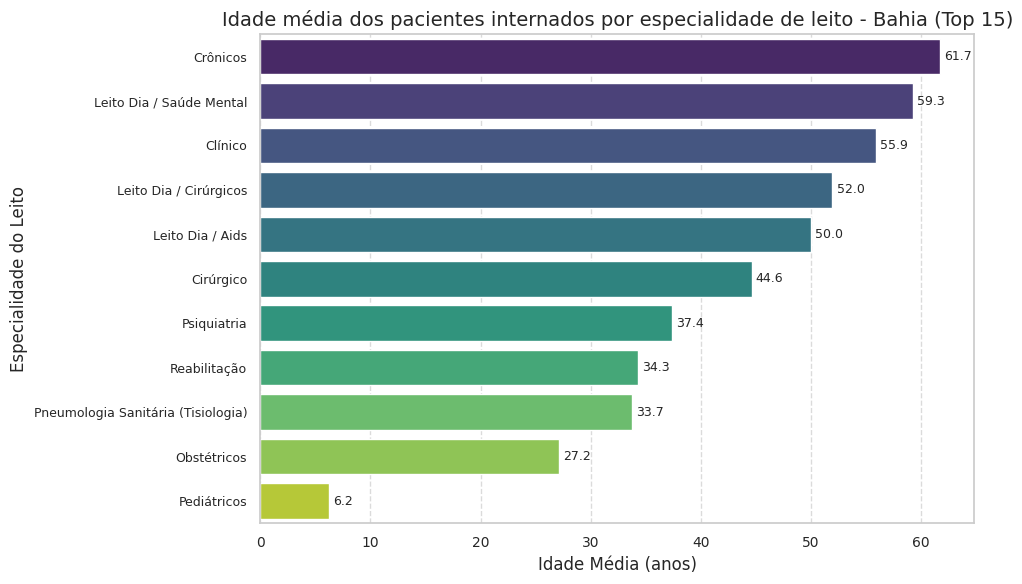

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário de mapeamento para ESPEC com base na lista do usuário
# Códigos são inteiros para corresponder ao dtype int64 da coluna ESPEC
# Removendo os prefixos (ex: "01-") para um gráfico mais limpo
map_espec = {
    1: 'Cirúrgico',
    2: 'Obstétricos',
    3: 'Clínico',
    4: 'Crônicos',
    5: 'Psiquiatria',
    6: 'Pneumologia Sanitária (Tisiologia)',
    7: 'Pediátricos',
    8: 'Reabilitação',
    9: 'Leito Dia / Cirúrgicos',
    10: 'Leito Dia / Aids',
    11: 'Leito Dia / Fibrose Cística',
    12: 'Leito Dia / Intercorrência Pós-Transplante',
    13: 'Leito Dia / Geriatria',
    14: 'Leito Dia / Saúde Mental',
    51: 'UTI II Adulto COVID 19',
    52: 'UTI II Pediátrica COVID 19',
    64: 'Unidade Intermediária',
    65: 'Unidade Intermediária Neonatal',
    74: 'UTI I',
    75: 'UTI Adulto II',
    76: 'UTI Adulto III',
    77: 'UTI Infantil I',
    78: 'UTI Infantil II',
    79: 'UTI Infantil III',
    80: 'UTI Neonatal I',
    81: 'UTI Neonatal II',
    82: 'UTI Neonatal III',
    83: 'UTI Queimados',
    84: 'Acolhimento Noturno',
    85: 'UTI Coronariana-UCO tipo II',
    86: 'UTI Coronariana-UCO tipo III',
    87: 'Saúde Mental (Clínico)',
    88: 'Queimado Adulto (Clínico)',
    89: 'Queimado Pediátrico (Clínico)',
    90: 'Queimado Adulto (Cirúrgico)',
    91: 'Queimado Pediátrico (Cirúrgico)',
    92: 'UCI Neonatal Convencional',
    93: 'UCI Neonatal Canguru',
    94: 'UCI Pediátrico',
    95: 'UCI Adulto',
    96: 'Suporte Ventilatório Pulmonar COVID-19'
}

# Adicionar a coluna com as descrições
# (Assumindo que df_bahia já existe)
df_bahia['Especialidade_Desc'] = df_bahia['ESPEC'].map(map_espec)

# Calcular idade média por especialidade de leito (usando a descrição)
# Assegurar que IDADE é numérica para o .mean()
df_bahia['IDADE'] = pd.to_numeric(df_bahia['IDADE'], errors='coerce')

idade_media = (
    df_bahia.groupby('Especialidade_Desc')['IDADE']
    .mean()
    .reset_index()
    .sort_values(by='IDADE', ascending=False)
)
# Manter o .head(15) conforme o código colado
idade_media = idade_media.head(15)

# Criar gráfico de barras horizontais
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Usar 'y' para a nova coluna 'Especialidade_Desc' e 'x' para 'IDADE'
ax = sns.barplot(data=idade_media, y='Especialidade_Desc', x='IDADE', palette='viridis')

# Títulos e rótulos (corrigidos para o gráfico horizontal)
plt.title('Idade média dos pacientes internados por especialidade de leito - Bahia (Top 15)', fontsize=14)
plt.xlabel('Idade Média (anos)', fontsize=12) # Label X correta
plt.ylabel('Especialidade do Leito', fontsize=12) # Label Y correta

# Melhorar legibilidade
plt.yticks(fontsize=9)
plt.xticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rótulos nos valores (à direita das barras)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

## Pergunta 5: Qual é o percentual de óbitos entre as internações na Bahia?

In [17]:
total_internacoes = len(df_bahia)

total_obitos = df_bahia[df_bahia['MORTE'] == 1].shape[0]

percentual_obitos = (total_obitos / total_internacoes) * 100
print(f"Total de internações na Bahia: {total_internacoes}")
print(f"Total de óbitos na Bahia: {total_obitos}")
print(f"Percentual de óbitos: {percentual_obitos:.2f}%")

Total de internações na Bahia: 72846
Total de óbitos na Bahia: 2896
Percentual de óbitos: 3.98%


## Pergunta 6: Qual é a proporção de gestantes de risco entre as internações obstétricas realizadas na Bahia?

In [18]:
# 1. Filtrar as internações obstétricas (ESPEC == 2 - Obstétricos) na Bahia
# O valor '2' é obtido do mapeamento para ESPEC na Pergunta 4, onde 2 = 'Obstétricos'
df_obstetricas_bahia = df_bahia[df_bahia['ESPEC'] == 2].copy()

# 2. Contar o total de internações obstétricas
total_obstetricas = len(df_obstetricas_bahia)

# 3. Contar as gestantes de risco (GESTRISCO == 1) entre as obstétricas
# O campo 'GESTRISCO' (Gestante de Risco) é um indicador com 1 (Sim) ou 0 (Não/Ausente).
# A coluna GESTRISCO no df_bahia é do tipo int64.
total_gestrisco = df_obstetricas_bahia[df_obstetricas_bahia['GESTRISCO'] == 1].shape[0]

# 4. Calcular o percentual
if total_obstetricas > 0:
    proporcao_gestrisco = (total_gestrisco / total_obstetricas) * 100
else:
    proporcao_gestrisco = 0

# 5. Imprimir o resultado
print(f"Total de internações obstétricas na Bahia: {total_obstetricas}")
print(f"Total de internações obstétricas de Gestantes de Risco (GESTRISCO=1): {total_gestrisco}")
print(f"Proporção de Gestantes de Risco entre internações obstétricas: {proporcao_gestrisco:.2f}%")

Total de internações obstétricas na Bahia: 12071
Total de internações obstétricas de Gestantes de Risco (GESTRISCO=1): 11955
Proporção de Gestantes de Risco entre internações obstétricas: 99.04%


## Pergunta 7: Qual é a distribuição de pacientes por raça/cor nos hospitais da Bahia?

Distribuição de internações por Raça/Cor na Bahia:
   RACA_COR_COD  Total_Internacoes        Raça/Cor  Percentual
0             3              62101           Parda   85.249705
1             2               6331           Preta    8.690937
2             1               3647          Branca    5.006452
3             4                678         Amarela    0.930731
4             5                 88        Indígena    0.120803
5            99                  1  Sem informação    0.001373


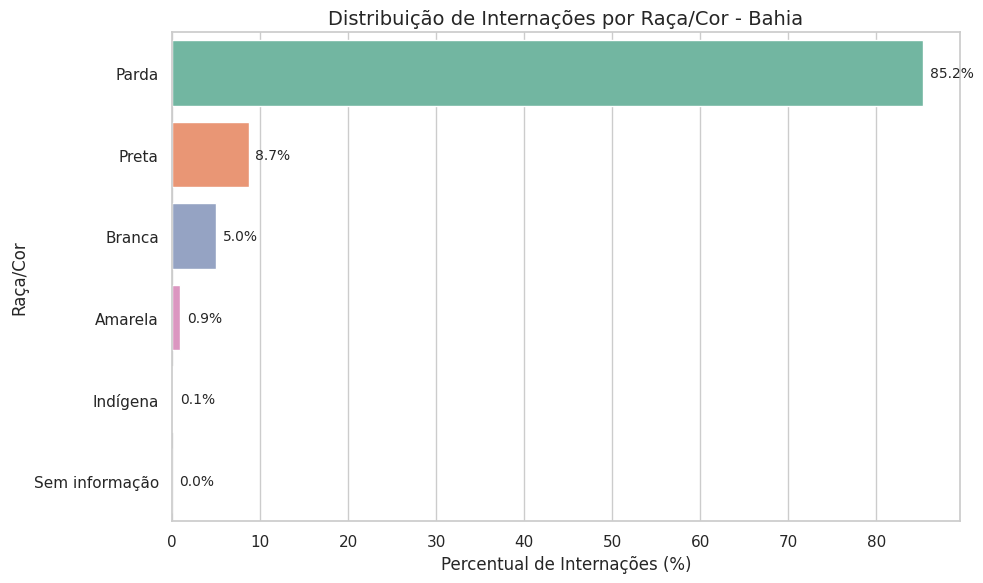

In [19]:
map_raca_cor = {
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    99: 'Sem informação'
}

# 1. Contar a frequência de cada código de Raça/Cor no df_bahia
raca_counts = df_bahia['RACA_COR'].value_counts().reset_index()
raca_counts.columns = ['RACA_COR_COD', 'Total_Internacoes']

# 2. Adicionar a descrição da Raça/Cor
raca_counts['Raça/Cor'] = raca_counts['RACA_COR_COD'].map(map_raca_cor)

# 3. Calcular o percentual de cada categoria
total_internacoes_bahia = raca_counts['Total_Internacoes'].sum()
raca_counts['Percentual'] = (raca_counts['Total_Internacoes'] / total_internacoes_bahia) * 100

# 4. Exibir a tabela de distribuição (ordenada por frequência)
print("Distribuição de internações por Raça/Cor na Bahia:")
print(raca_counts.sort_values(by='Total_Internacoes', ascending=False))

# 5. Criar um gráfico de barras para visualização
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=raca_counts,
    x='Percentual',
    y='Raça/Cor',
    palette='Set2',
    order=raca_counts.sort_values('Total_Internacoes', ascending=False)['Raça/Cor']
)

# Títulos e rótulos
plt.title('Distribuição de Internações por Raça/Cor - Bahia', fontsize=14)
plt.xlabel('Percentual de Internações (%)', fontsize=12)
plt.ylabel('Raça/Cor', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 8: Qual é o tempo médio de permanência por faixa etária no estado da Bahia?

Tempo médio de permanência (dias) por faixa etária na Bahia:
| Faixa_Etaria   |   Tempo_Medio_Permanencia_(dias) |
|:---------------|---------------------------------:|
| 80–89          |                          6.9199  |
| 90–99          |                          6.7674  |
| 70–79          |                          6.40838 |
| 60–69          |                          5.89425 |
| 50–59          |                          5.42861 |
| 40–49          |                          4.3909  |
| 0–9            |                          4.32762 |
| 10–19          |                          3.55306 |
| 30–39          |                          3.42391 |
| 20–29          |                          3.15327 |


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


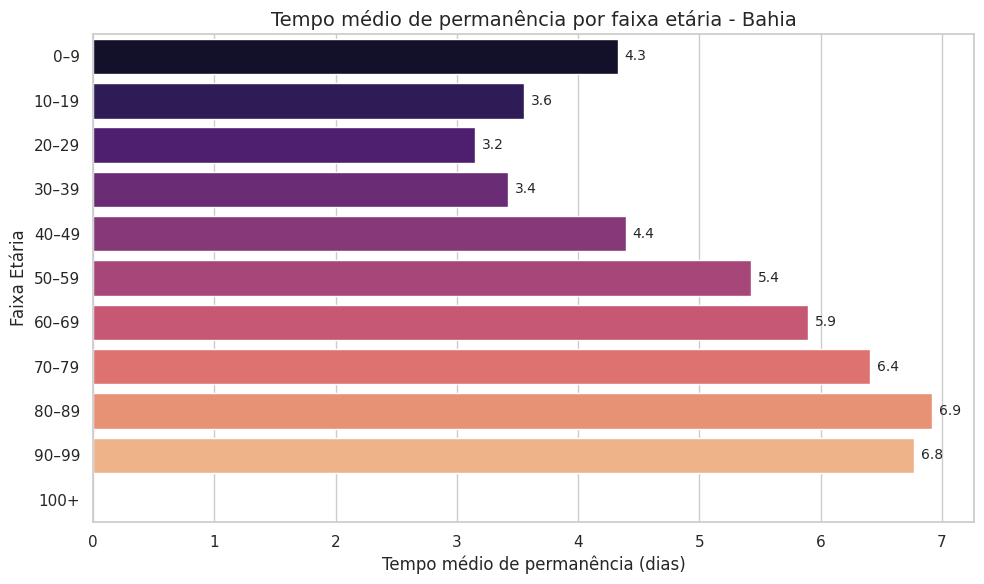

In [20]:
# Mapeamento e cálculo da faixa etária
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0–9', '10–19', '20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80–89', '90–99', '100+']

# Preenche NaNs com 0 para evitar erro no .astype(int) no pd.cut
df_bahia['IDADE_INT'] = df_bahia['IDADE'].fillna(0).astype(int)
df_bahia['faixa_etaria'] = pd.cut(df_bahia['IDADE_INT'], bins=bins, labels=labels, right=True, ordered=False)

# Tratar NaNs na coluna DIAS_PERM e faixa_etaria
df_bahia.dropna(subset=['DIAS_PERM', 'faixa_etaria'], inplace=True)

# Calcular o tempo médio de permanência (DIAS_PERM) por faixa etária
tempo_medio_permanencia = (
    df_bahia.groupby('faixa_etaria', observed=True)['DIAS_PERM']
    .mean()
    .reset_index()
    .sort_values(by='DIAS_PERM', ascending=False)
)
tempo_medio_permanencia.columns = ['Faixa_Etaria', 'Tempo_Medio_Permanencia_(dias)']

# Exibir a tabela com o resultado
print("Tempo médio de permanência (dias) por faixa etária na Bahia:")
print(tempo_medio_permanencia.to_markdown(index=False))

# 4. Criar o gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=tempo_medio_permanencia,
    x='Tempo_Medio_Permanencia_(dias)',
    y='Faixa_Etaria',
    palette='magma',
    order=labels, # Garante que a ordem do eixo Y seja lógica (das faixas etárias)
)

# Títulos e rótulos
plt.title('Tempo médio de permanência por faixa etária - Bahia', fontsize=14)
plt.xlabel('Tempo médio de permanência (dias)', fontsize=12)
plt.ylabel('Faixa Etária', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 9: Há diferenças no tempo de permanência entre homens e mulheres internados na Bahia?

Tempo médio de permanência por sexo na Bahia:
| Sexo      |   Tempo_Medio_Permanencia_(dias) |
|:----------|---------------------------------:|
| Masculino |                          5.35623 |
| Feminino  |                          4.04539 |


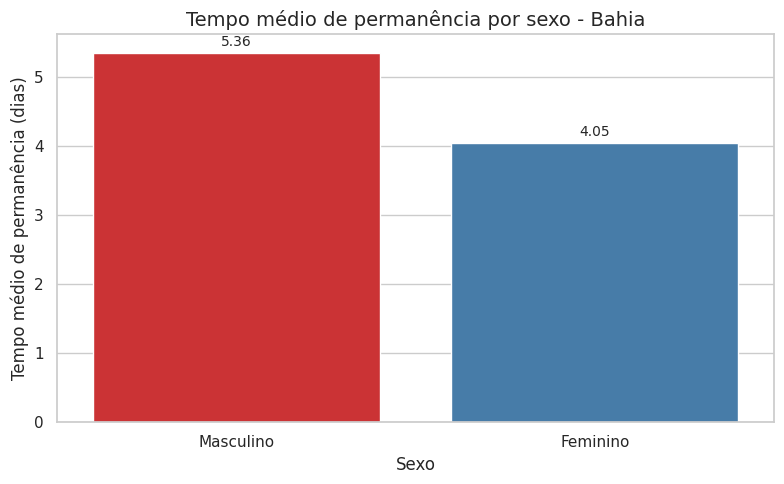

In [21]:
# Remover NaNs nas colunas essenciais
df_bahia.dropna(subset=['DIAS_PERM', 'SEXO'], inplace=True)

# Mapeamento para os rótulos do gráfico
map_sexo = {1: 'Masculino', 2: 'Feminino'}

# Calcular o tempo médio de permanência por sexo
tempo_medio_sexo = (
    df_bahia.groupby('SEXO')['DIAS_PERM']
    .mean()
    .reset_index()
    .sort_values(by='DIAS_PERM', ascending=False)
)
tempo_medio_sexo.columns = ['SEXO_COD', 'Tempo_Medio_Permanencia_(dias)']
tempo_medio_sexo['Sexo'] = tempo_medio_sexo['SEXO_COD'].map(map_sexo)


# --- Visualização e Saída ---
print("Tempo médio de permanência por sexo na Bahia:")
print(tempo_medio_sexo[['Sexo', 'Tempo_Medio_Permanencia_(dias)']].to_markdown(index=False))

# Criar o gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=tempo_medio_sexo,
    x='Sexo',
    y='Tempo_Medio_Permanencia_(dias)',
    palette='Set1'
)

# Títulos e rótulos
plt.title('Tempo médio de permanência por sexo - Bahia', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Tempo médio de permanência (dias)', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

## Pergunta 10: Qual é a proporção de internações com infecção hospitalar nos hospitais baianos?

Distribuição das Internações por Capítulo Principal da CID-10 na Bahia:
| Capitulo_CID                                       |   Frequencia |   Percentual |
|:---------------------------------------------------|-------------:|-------------:|
| XV. Gravidez parto e puerpério                     |        13064 |    18.1947   |
| XIX. Lesões enven e alg out conseq causas externas |         8791 |    12.2436   |
| XI. Doenças do aparelho digestivo                  |         8244 |    11.4817   |
| IX. Doenças do aparelho circulatório               |         6509 |     9.06533  |
| XIV. Doenças do aparelho geniturinário             |         5616 |     7.82162  |
| X. Doenças do aparelho respiratório                |         5105 |     7.10993  |
| I. Algumas doenças infecciosas e parasitárias      |         4917 |     6.84809  |
| II. Neoplasias (tumores)                           |         3219 |     4.48322  |
| III. Doenças sangue órgãos hemat e transt imunitár |         2955 |     4.11

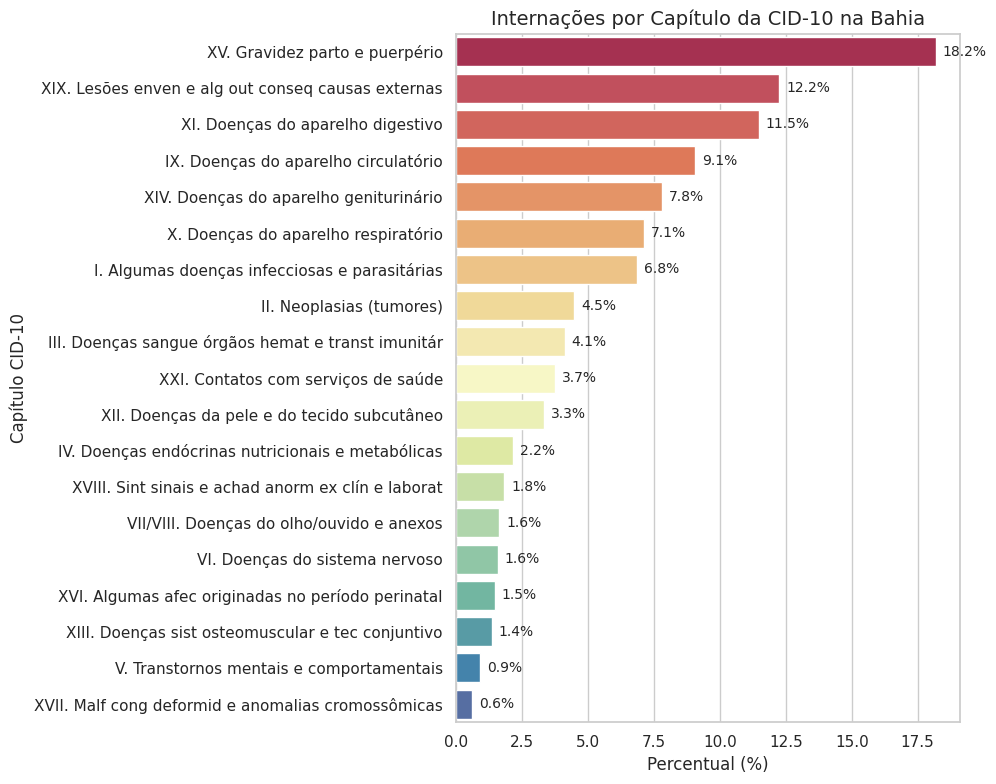

In [22]:
map_cid_capitulo = {
    'A': 'I. Algumas doenças infecciosas e parasitárias', 'B': 'I. Algumas doenças infecciosas e parasitárias',
    'C': 'II. Neoplasias (tumores)', 'D': 'III. Doenças sangue órgãos hemat e transt imunitár',
    'E': 'IV. Doenças endócrinas nutricionais e metabólicas',
    'F': 'V. Transtornos mentais e comportamentais',
    'G': 'VI. Doenças do sistema nervoso',
    'H': 'VII/VIII. Doenças do olho/ouvido e anexos', # H00-H95
    'I': 'IX. Doenças do aparelho circulatório',
    'J': 'X. Doenças do aparelho respiratório',
    'K': 'XI. Doenças do aparelho digestivo',
    'L': 'XII. Doenças da pele e do tecido subcutâneo',
    'M': 'XIII. Doenças sist osteomuscular e tec conjuntivo',
    'N': 'XIV. Doenças do aparelho geniturinário',
    'O': 'XV. Gravidez parto e puerpério',
    'P': 'XVI. Algumas afec originadas no período perinatal',
    'Q': 'XVII. Malf cong deformid e anomalias cromossômicas',
    'R': 'XVIII. Sint sinais e achad anorm ex clín e laborat',
    'S': 'XIX. Lesões enven e alg out conseq causas externas',
    'T': 'XIX. Lesões enven e alg out conseq causas externas',
    'V': 'XX. Causas externas de morbidade e mortalidade',
    'W': 'XX. Causas externas de morbidade e mortalidade',
    'X': 'XX. Causas externas de morbidade e mortalidade',
    'Y': 'XX. Causas externas de morbidade e mortalidade',
    'Z': 'XXI. Contatos com serviços de saúde',
    'U': 'XXII. Códigos para propósitos especiais' # U04-U99
}

# Tratar e limpar DIAG_PRINC
df_bahia.dropna(subset=['DIAG_PRINC'], inplace=True)
df_bahia = df_bahia[df_bahia['DIAG_PRINC'].str.len() >= 1].copy()

# Extrair a primeira letra (Capítulo CID-10)
df_bahia['CAPITULO_CID'] = df_bahia['DIAG_PRINC'].str[0].str.upper()

# Aplicar o mapeamento da descrição
df_bahia['DESCRICAO_CAPITULO'] = df_bahia['CAPITULO_CID'].map(map_cid_capitulo)

# Contar a frequência
frequencia_capitulos = (
    df_bahia['DESCRICAO_CAPITULO']
    .value_counts()
    .reset_index()
)
frequencia_capitulos.columns = ['Capitulo_CID', 'Frequencia']

# Calcular o percentual
total_internacoes = frequencia_capitulos['Frequencia'].sum()
frequencia_capitulos['Percentual'] = (frequencia_capitulos['Frequencia'] / total_internacoes) * 100

# Exibir o resultado
print("Distribuição das Internações por Capítulo Principal da CID-10 na Bahia:")
print(frequencia_capitulos.to_markdown(index=False, floatfmt=(".0f", ".2f")))

# --- Visualização ---
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Ordena o gráfico pela frequência
ordem = frequencia_capitulos.sort_values(by='Frequencia', ascending=False)['Capitulo_CID']

ax = sns.barplot(
    data=frequencia_capitulos,
    x='Percentual',
    y='Capitulo_CID',
    palette='Spectral',
    order=ordem
)

# Títulos e rótulos
plt.title('Internações por Capítulo da CID-10 na Bahia', fontsize=14)
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Capítulo CID-10', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 11: Quais hospitais da Bahia registraram o maior número de internações?

Os 10 Hospitais da Bahia (por CNES) com o maior número de internações:
|    CNES |   Total_Internacoes |
|--------:|--------------------:|
| 2802104 |                1937 |
|    3859 |                1558 |
|    4294 |                1322 |
| 6595197 |                1253 |
|    3786 |                1239 |
| 2799758 |                1156 |
| 3956369 |                1154 |
| 2402076 |                1133 |
| 2601680 |                1103 |
| 3972925 |                1095 |


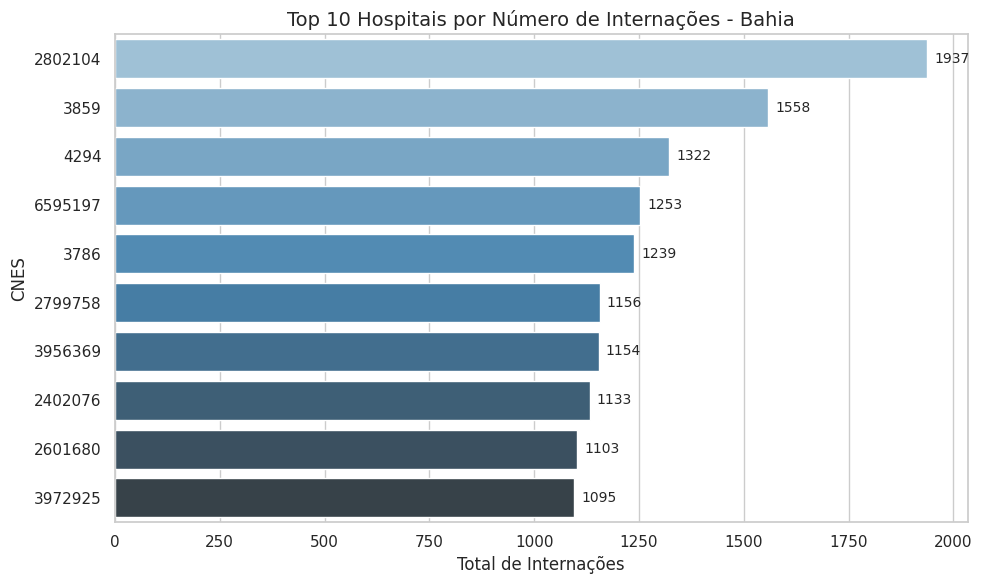

In [23]:
# Remover NaNs/entradas inválidas
df_bahia.dropna(subset=['CNES'], inplace=True)
df_bahia['CNES'] = df_bahia['CNES'].astype(str)
df_bahia = df_bahia[df_bahia['CNES'].str.len() > 0].copy() 

# Calcular a frequência (Contagem de internações) por CNES
frequencia_hospitais = (
    df_bahia['CNES']
    .value_counts()
    .reset_index()
)
frequencia_hospitais.columns = ['CNES', 'Total_Internacoes']

# Selecionar os 10 hospitais mais frequentes
top_10_hospitais = frequencia_hospitais.head(10)

# --- Saída ---
print("Os 10 Hospitais da Bahia (por CNES) com o maior número de internações:")
print(top_10_hospitais.to_markdown(index=False))

# --- Visualização (Opcional, mas útil) ---
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top_10_hospitais,
    x='Total_Internacoes',
    y='CNES',
    palette='Blues_d'
)

# Títulos e rótulos
plt.title('Top 10 Hospitais por Número de Internações - Bahia', fontsize=14)
plt.xlabel('Total de Internações', fontsize=12)
plt.ylabel('CNES', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 12: Qual é o tempo médio de permanência por hospital baiano?

Os 10 Hospitais da Bahia (por CNES) com o MAIOR tempo médio de permanência:
|    CNES |   Tempo_Medio_Permanencia_(dias) |
|--------:|---------------------------------:|
| 2386739 |                            27.92 |
| 2510189 |                            22.74 |
| 4024370 |                            22.20 |
|    5436 |                            17.40 |
| 7160488 |                            17.04 |
|    5428 |                            15.38 |
| 2603063 |                            14.04 |
| 3906787 |                            12.00 |
| 6670385 |                            11.86 |
|    4987 |                            11.36 |


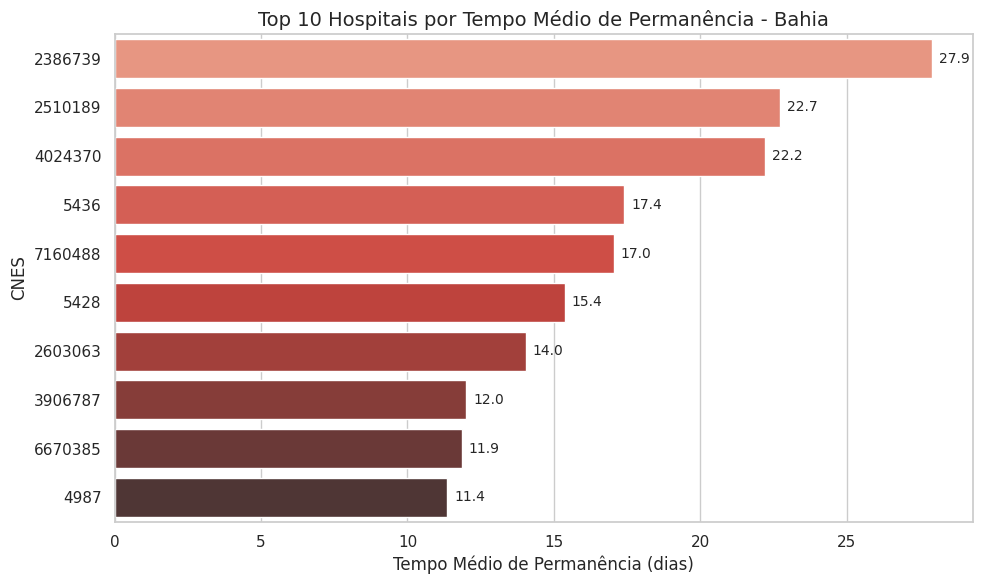

In [24]:
# Remover NaNs/entradas inválidas
df_bahia.dropna(subset=['CNES', 'DIAS_PERM'], inplace=True)
df_bahia = df_bahia[df_bahia['CNES'].str.len() > 0].copy() 

# 1. Calcular o tempo médio de permanência por CNES
tempo_medio_hospitais = (
    df_bahia.groupby('CNES')['DIAS_PERM']
    .mean()
    .reset_index()
    .sort_values(by='DIAS_PERM', ascending=False)
)
tempo_medio_hospitais.columns = ['CNES', 'Tempo_Medio_Permanencia_(dias)']

# Selecionar os 10 hospitais com maior tempo médio de permanência
top_10_tempo_medio = tempo_medio_hospitais.head(10)

# --- Saída ---
print("Os 10 Hospitais da Bahia (por CNES) com o MAIOR tempo médio de permanência:")
print(top_10_tempo_medio.to_markdown(index=False, floatfmt=".2f"))

# --- Visualização (Opcional, mas útil) ---
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top_10_tempo_medio,
    x='Tempo_Medio_Permanencia_(dias)',
    y='CNES',
    palette='Reds_d'
)

# Títulos e rótulos
plt.title('Top 10 Hospitais por Tempo Médio de Permanência - Bahia', fontsize=14)
plt.xlabel('Tempo Médio de Permanência (dias)', fontsize=12)
plt.ylabel('CNES', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 13: Quais hospitais da Bahia têm maior taxa de mortalidade hospitalar?

Nota: Apenas hospitais com 50 ou mais internações são considerados para a taxa de mortalidade.

Os 10 Hospitais da Bahia (por CNES) com a MAIOR Taxa de Mortalidade Hospitalar:
|    CNES |   Total_Internacoes |   Total_Obitos |   Taxa_Mortalidade_(%) |
|--------:|--------------------:|---------------:|-----------------------:|
| 3791130 |                  82 |             23 |                  28.05 |
| 2487438 |                 508 |             94 |                  18.50 |
| 6659772 |                  76 |             13 |                  17.11 |
| 2802112 |                  66 |             10 |                  15.15 |
| 2385171 |                 721 |            108 |                  14.98 |
| 2549905 |                  87 |             13 |                  14.94 |
| 2407205 |                 103 |             15 |                  14.56 |
| 2514311 |                  66 |              9 |                  13.64 |
|    4073 |                 533 |             64 |              

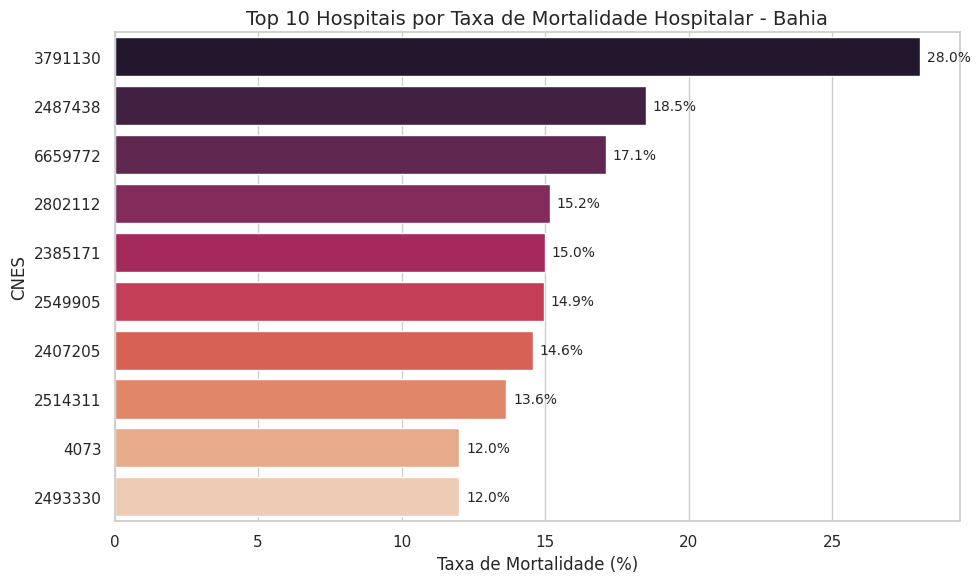

In [25]:
# CNES deve ser tratado como string
df_bahia['CNES'] = df_bahia['CNES'].astype(str).str.strip()
# MORT (0=Não, 1=Sim/Óbito)
df_bahia['MORTE'] = pd.to_numeric(df_bahia['MORTE'], errors='coerce')

# Remover NaNs/entradas inválidas
df_bahia.dropna(subset=['CNES', 'MORTE'], inplace=True)
df_bahia = df_bahia[df_bahia['CNES'].str.len() > 0].copy()

# 1. Agrupar e calcular o número de óbitos (MORT == 1) e o total de internações
mortalidade_hosp = df_bahia.groupby('CNES').agg(
    Total_Internacoes=('MORTE', 'size'),
    # Óbito é representado pelo código 1 na coluna MORT
    Total_Obitos=('MORTE', lambda x: (x == 1).sum())
).reset_index()

# 2. Definir um limite mínimo de internações para calcular a taxa (para relevância estatística)
MIN_INTERNACOES = 50
mortalidade_hosp = mortalidade_hosp[mortalidade_hosp['Total_Internacoes'] >= MIN_INTERNACOES].copy()
print(f"Nota: Apenas hospitais com {MIN_INTERNACOES} ou mais internações são considerados para a taxa de mortalidade.")

# 3. Calcular a Taxa de Mortalidade
mortalidade_hosp['Taxa_Mortalidade_(%)'] = (mortalidade_hosp['Total_Obitos'] / mortalidade_hosp['Total_Internacoes']) * 100

# 4. Selecionar os 10 hospitais com a maior taxa
top_10_mortalidade = mortalidade_hosp.sort_values(by='Taxa_Mortalidade_(%)', ascending=False).head(10)

# --- Saída ---
print("\nOs 10 Hospitais da Bahia (por CNES) com a MAIOR Taxa de Mortalidade Hospitalar:")
print(top_10_mortalidade[['CNES', 'Total_Internacoes', 'Total_Obitos', 'Taxa_Mortalidade_(%)']].to_markdown(index=False, floatfmt=".2f"))

# --- Visualização (Opcional, mas útil) ---
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top_10_mortalidade,
    x='Taxa_Mortalidade_(%)',
    y='CNES',
    palette='rocket'
)

# Títulos e rótulos
plt.title('Top 10 Hospitais por Taxa de Mortalidade Hospitalar - Bahia', fontsize=14)
plt.xlabel('Taxa de Mortalidade (%)', fontsize=12)
plt.ylabel('CNES', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 14: Qual é o valor médio total (VAL_TOT) das AIHs por hospital no estado da Bahia?

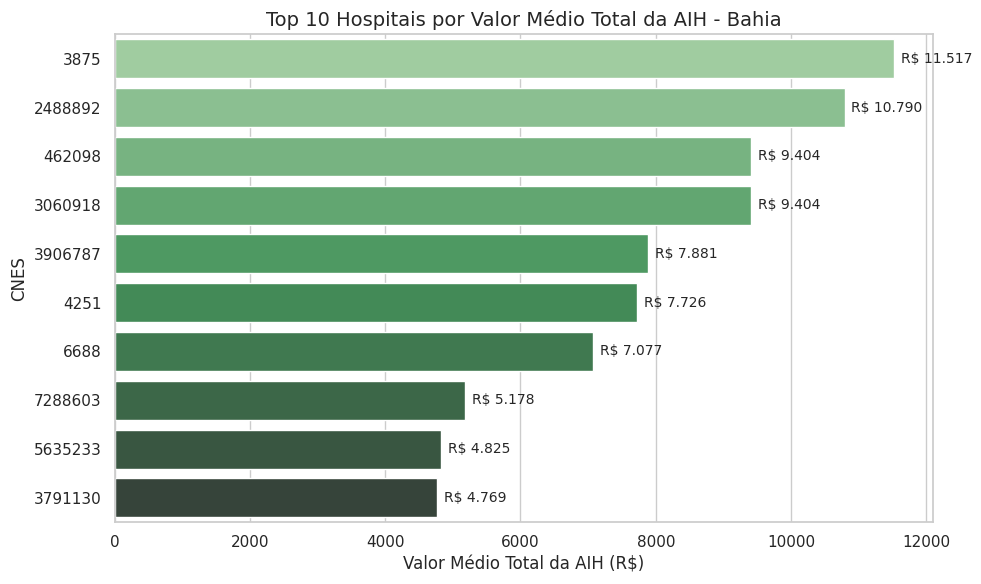

In [26]:
# Agrupar e calcular o valor médio total por hospital
valor_medio_hosp = df_bahia.groupby('CNES')['VAL_TOT'].mean().reset_index()
valor_medio_hosp.columns = ['CNES', 'VALOR_MEDIO_TOTAL_AIH']

# Selecionar os 10 hospital com o maior valor médio
top_10_valor_medio = valor_medio_hosp.sort_values(by='VALOR_MEDIO_TOTAL_AIH', ascending=False).head(10)

# Visualização
plt.figure(figsize=(10, 6))

ax= sns.barplot(
    data=top_10_valor_medio,
    x='VALOR_MEDIO_TOTAL_AIH',
    y='CNES',
    palette='Greens_d'   
)

plt.title('Top 10 Hospitais por Valor Médio Total da AIH - Bahia', fontsize=14)
plt.xlabel('Valor Médio Total da AIH (R$)', fontsize=12)
plt.ylabel('CNES', fontsize=12)

for container in ax.containers:
    labels = [f'R$ {v:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 15: Quais hospitais baianos têm maior proporção de internações em UTI?


Os 10 Hospitais da Bahia (por CNES) com a MAIOR Proporção de Internações em UTI:
|    CNES |   Total_Internacoes |   Total_UTI |   Proporcao_UTI_(%) |
|--------:|--------------------:|------------:|--------------------:|
| 3791130 |                  82 |          57 |               69.51 |
| 6659772 |                  76 |          41 |               53.95 |
| 2509369 |                  82 |          43 |               52.44 |
| 7160488 |                 166 |          69 |               41.57 |
|    3875 |                 665 |         271 |               40.75 |
| 2557509 |                 100 |          40 |               40.00 |
|    4073 |                 533 |         197 |               36.96 |
| 2772280 |                 375 |         137 |               36.53 |
| 2488892 |                 106 |          37 |               34.91 |
|    4251 |                 111 |          34 |               30.63 |


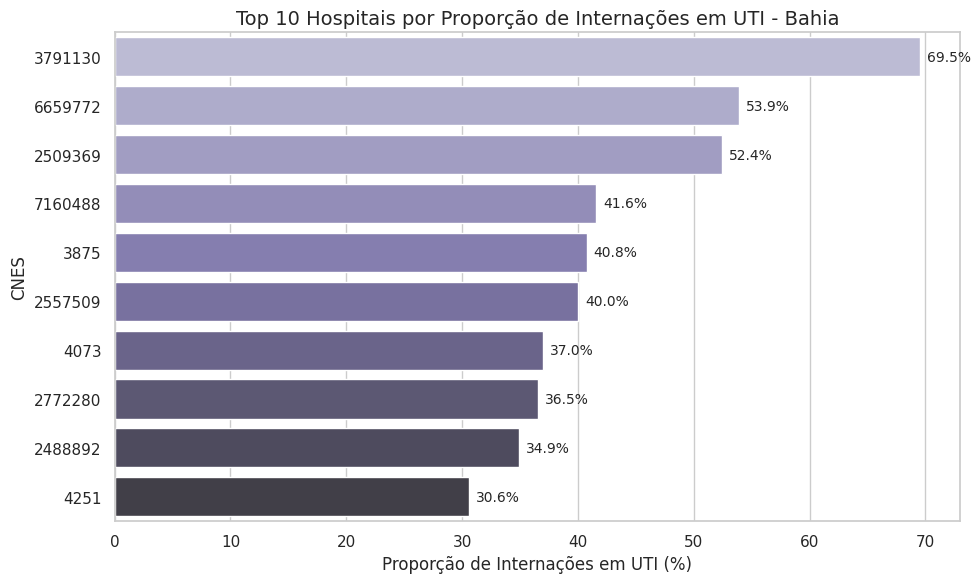

In [27]:
# Agrupar e calcular o total de internações e o total de internações em UTI (MARCA_UTI > 0)
proporcao_uti_hosp = df_bahia.groupby('CNES').agg(
    Total_Internacoes=('MARCA_UTI', 'size'),
    Total_UTI=('MARCA_UTI', lambda x: (x > 0).sum())
).reset_index()

# Definir um limite mínimo de internações para calcular a proporção (para relevância estatística)
MIN_INTERNACOES = 50
proporcao_uti_hosp = proporcao_uti_hosp[proporcao_uti_hosp['Total_Internacoes'] >= MIN_INTERNACOES].copy()

# Calcular a Proporção de UTI
proporcao_uti_hosp['Proporcao_UTI_(%)'] = (proporcao_uti_hosp['Total_UTI'] / proporcao_uti_hosp['Total_Internacoes']) * 100

# Selecionar os 10 hospitais com a maior proporção de UTI
top_10_uti = proporcao_uti_hosp.sort_values(by='Proporcao_UTI_(%)', ascending=False).head(10)

# --- Saída ---
print("\nOs 10 Hospitais da Bahia (por CNES) com a MAIOR Proporção de Internações em UTI:")
print(top_10_uti[['CNES', 'Total_Internacoes', 'Total_UTI', 'Proporcao_UTI_(%)']].to_markdown(index=False, floatfmt=".2f"))

# --- Visualização (Opcional, mas útil) ---
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top_10_uti,
    x='Proporcao_UTI_(%)',
    y='CNES',
    palette='Purples_d'
)

# Títulos e rótulos
plt.title('Top 10 Hospitais por Proporção de Internações em UTI - Bahia', fontsize=14)
plt.xlabel('Proporção de Internações em UTI (%)', fontsize=12)
plt.ylabel('CNES', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 16: Qual é o valor total gasto com internações hospitalares na Bahia?

In [28]:
# Calcular o valor total gasto
valor_total_gasto = df_bahia['VAL_TOT'].sum()
print(f"O Valor Total Gasto (VAL_TOT) com internações hospitalares na Bahia é:")
print(f"R$ {valor_total_gasto:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

O Valor Total Gasto (VAL_TOT) com internações hospitalares na Bahia é:
R$ 94.901.326,67


## Pergunta 17: Qual é o custo médio por internação em hospitais da Bahia?

In [29]:
# Calcular o Custo Médio por Internação
custo_medio_internacao = df_bahia['VAL_TOT'].mean()

print(f"O Custo Médio por internação em hospitais da Bahia é:")
print(f"R$ {custo_medio_internacao:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

O Custo Médio por internação em hospitais da Bahia é:
R$ 1.321,73


## Pergunta 18: Qual é o valor médio das internações com óbito versus sem óbito no estado da Bahia?

Valor Médio das Internações (R$) com e sem Óbito na Bahia:
| Status    | Valor_Medio_R$   |
|:----------|:-----------------|
| Com Óbito | R$ 2.970,75      |
| Sem Óbito | R$ 1.253,77      |


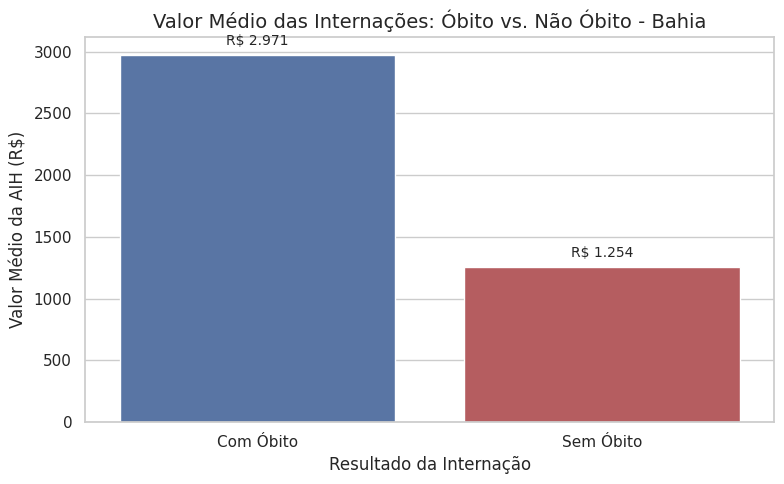

In [30]:
# Mapeamento para os rótulos de saída
map_obito = {0: 'Sem Óbito', 1: 'Com Óbito'}
df_bahia['Status_Obito'] = df_bahia['MORTE'].map(map_obito)

# Calcular o Valor Médio Total (VAL_TOT) por Status_Obito
valor_medio_obito = (
    df_bahia.groupby('Status_Obito')['VAL_TOT']
    .mean()
    .reset_index()
    .sort_values(by='VAL_TOT', ascending=False)
)
valor_medio_obito.columns = ['Status', 'Valor_Medio_Internacao']

print("Valor Médio das Internações (R$) com e sem Óbito na Bahia:")
# Formatação para R$
valor_medio_obito['Valor_Medio_R$'] = valor_medio_obito['Valor_Medio_Internacao'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

print(valor_medio_obito[['Status', 'Valor_Medio_R$']].to_markdown(index=False))

# --- Visualização ---
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=valor_medio_obito,
    x='Status',
    y='Valor_Medio_Internacao',
    palette=['#4c72b0', '#c44e52']
)

plt.title('Valor Médio das Internações: Óbito vs. Não Óbito - Bahia', fontsize=14)
plt.xlabel('Resultado da Internação', fontsize=12)
plt.ylabel('Valor Médio da AIH (R$)', fontsize=12)

# Adicionar rótulos de dados
for container in ax.containers:
    labels = [f'R$ {v:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.') for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=5)

plt.tight_layout()
plt.show()

## Pergunta 19: Como evoluem os custos médios mensais das internações na Bahia?

In [31]:
df_bahia['VAL_TOT'] = pd.to_numeric(df_bahia['VAL_TOT'], errors='coerce')
df_bahia['COMPLEX'] = pd.to_numeric(df_bahia['COMPLEX'], errors='coerce')

# Remover NaNs
df_bahia.dropna(subset=['VAL_TOT', 'COMPLEX'], inplace=True)

# Filtrar internações de ALTA COMPLEXIDADE
df_alta_complexidade = df_bahia[df_bahia['COMPLEX'] == 3].copy()

# 2. Calcular o Valor Total Gasto (soma de VAL_TOT)
valor_total_alta_complexidade = df_alta_complexidade['VAL_TOT'].sum()

print(f"O Valor Total Gasto com internações de Alta Complexidade na Bahia é:")
print(f"R$ {valor_total_alta_complexidade:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))

O Valor Total Gasto com internações de Alta Complexidade na Bahia é:
R$ 29.627.363,24
